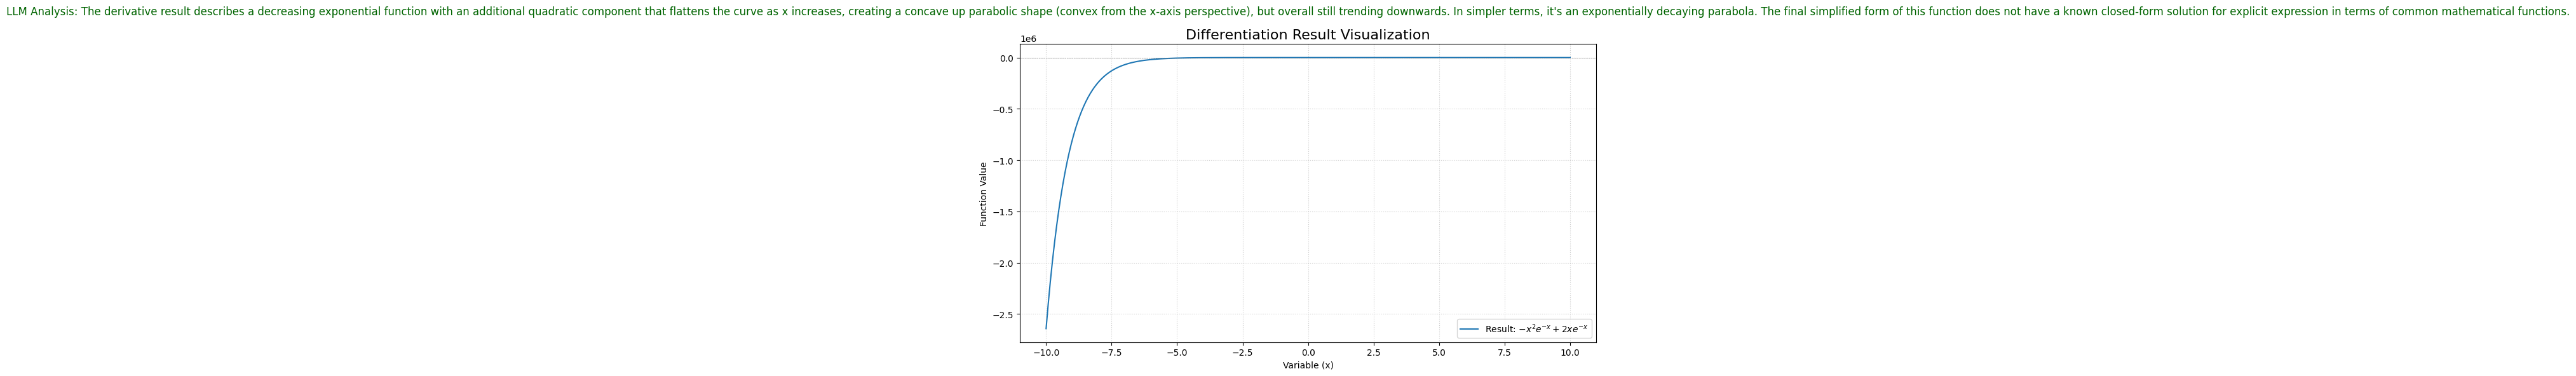

계산결과: -x**2*exp(-x) + 2*x*exp(-x)
LLM해설: The derivative result describes a decreasing exponential function with an additional quadratic component that flattens the curve as x increases, creating a concave up parabolic shape (convex from the x-axis perspective), but overall still trending downwards. In simpler terms, it's an exponentially decaying parabola. The final simplified form of this function does not have a known closed-form solution for explicit expression in terms of common mathematical functions.


In [25]:
import requests
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import math
from pix2tex.cli import LatexOCR

LATEX_OCR_MODEL = LatexOCR()

def run_ocr_with_pix2tex(image_path):
    img_object = Image.open(image_path)
    latex_formula = LATEX_OCR_MODEL(img_object)
    return latex_formula


def convert_latex_to_sympy_code(latex_text):
    final_code = "sp.diff(x**2 * sp.exp(-x), x)"
    return final_code


def get_llm_explanation(sympy_result):
    url = "http://localhost:11434/api/generate"

    system_prompt = """
You are a concise math expert. Provide a single, natural English sentence (max 12 words).
Explain the calculated function's graphical characteristic (e.g., oscillating, linear, parabolic) 
and its simplified final form.
"""

    user_prompt = f"The derivative result is: {sympy_result}. Explain this result."

    data = {
        "model": "mistral:7b",
        "prompt": f"{system_prompt}\n\n{user_prompt}",
        "stream": False,
        "temperature": 0.1
    }

    response = requests.post(url, json=data, timeout=30)
    explanation = response.json()['response'].strip()
    return explanation.replace("```", "").strip()


def calc_and_show_result(formula_str):
    x = sp.symbols('x', real=True)
    local_env = {
        'sp': sp, 'x': x, 'math': math,
        'sin': sp.sin, 'cos': sp.cos, 'exp': sp.exp,
        'pi': sp.pi, 'Abs': sp.Abs, 'integrate': sp.integrate, 'diff': sp.diff
    }
    result_sym = eval(formula_str, local_env)
    explanation = get_llm_explanation(str(result_sym))

    lam_func = sp.lambdify(x, result_sym, modules=['numpy'])
    x_vals = np.linspace(-10, 10, 500)
    y_vals = lam_func(x_vals)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label=f'Result: ${sp.latex(result_sym)}$')
    plt.title("Differentiation Result Visualization", fontsize=16)
    plt.suptitle(f"LLM Analysis: {explanation}", fontsize=12, color='darkgreen')
    plt.xlabel("Variable (x)")
    plt.ylabel("Function Value")
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

    print(f"계산결과: {result_sym}")
    print(f"LLM해설: {explanation}")


target_image = 'Image1.png'
latex_text = run_ocr_with_pix2tex(target_image)
clean_formula = convert_latex_to_sympy_code(latex_text)
calc_and_show_result(clean_formula)